Import Required Library:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Datasets:

In [2]:
file_path="../data/raw_analyst_ratings.csv"
df=pd.read_csv(file_path)
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [3]:
#Extract  the datasets into column names and data types:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [4]:
# Descriptive statistics for for textual lengths:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [5]:
#Descriptive statistics for the length of news article headlines
df['headline_length'] = df['headline'].apply(len)
mean_length = df['headline_length'].mean()
median_length = df['headline_length'].median()
std_dev = df['headline_length'].std()
range_min = df['headline_length'].min()
range_max = df['headline_length'].max()

print(f"Mean headline length: {mean_length:.2f} characters")
print(f"Median headline length: {median_length:.2f} characters")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Range: {range_min} - {range_max} characters")

Mean headline length: 73.12 characters
Median headline length: 64.00 characters
Standard deviation: 40.74
Range: 3 - 512 characters


In [6]:
# Count the number of articles per publisher
article_counts = df['publisher'].value_counts()
print("Articles per publisher:")
print(article_counts)

Articles per publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [7]:
# Analyze the publication dates:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', utc=True, errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
day_counts = df['day_of_week'].value_counts()

print(day_counts)

day_of_week
Thursday     12712
Wednesday    11873
Tuesday      11037
Monday       10297
Friday        9407
Sunday         388
Saturday       273
Name: count, dtype: int64


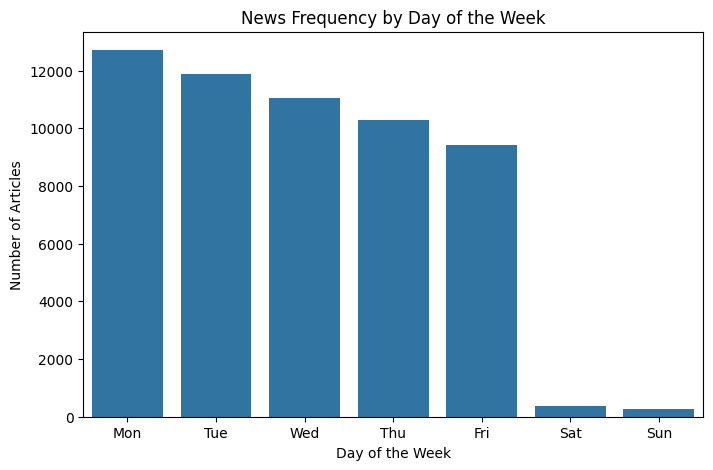

In [8]:
# Display the result using barplot:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('News Frequency by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

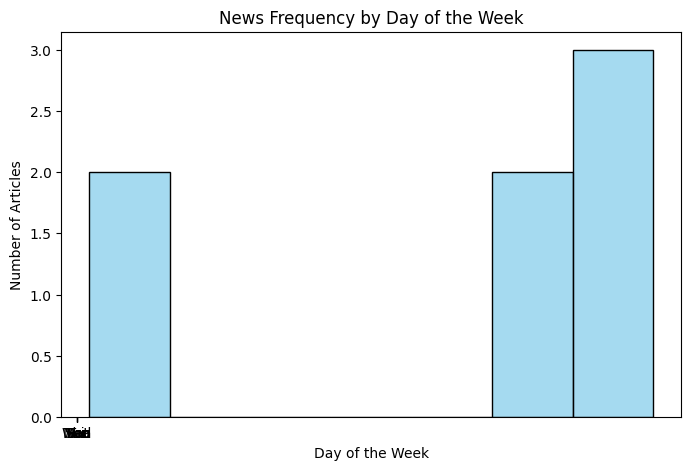

In [9]:
#Display the result using histogram plot:
plt.figure(figsize=(8, 5))
sns.histplot(day_counts, bins=7, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('News Frequency by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()